In [1]:
import datajoint as dj

In [2]:
import sys
sys.path.append('c:\\Users\\liul.HHMI\\Desktop\\map-ephys\\pipeline') # go to parent dir
sys.path.append('c:\\Users\\liul.HHMI\\Desktop\\map-ephys\\scripts')
sys.path.append('c:\\Users\\liul.HHMI\\Desktop\\map-ephys\\development')
sys.path.append('c:\\Users\\liul.HHMI\\Desktop\\map-lab')

In [12]:
import warnings
warnings.simplefilter(action='ignore', category=RuntimeWarning)

In [5]:
import ephys

Connecting daveliu@mesoscale-activity.datajoint.io:3306


In [ ]:
dj.ERD(ephys.experiment)

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import scipy as sp

In [ ]:
dj.ERD(ephys)-1

In [6]:
behaviorT=ephys.experiment.BehaviorTrial()

In [7]:
#animal = 399752
#sessionN = 22
animal = 407513
sessionN = 10
contraH=(behaviorT & {'subject_id': animal} & {'session': sessionN} & 'outcome = "hit"' & 'trial_instruction = "right"' & 'early_lick = "no early"').fetch('trial')
ipsiH=(behaviorT & {'subject_id': animal} & {'session': sessionN} & 'outcome = "hit"' & 'trial_instruction = "left"' & 'early_lick = "no early"').fetch('trial')
contraE=(behaviorT & {'subject_id': animal} & {'session': sessionN} & 'outcome = "miss"' & 'trial_instruction = "right"' & 'early_lick = "no early"').fetch('trial')
ipsiE=(behaviorT & {'subject_id': animal} & {'session': sessionN} & 'outcome = "miss"' & 'trial_instruction = "left"' & 'early_lick = "no early"').fetch('trial')

In [16]:
#offset=2.95
offset=3.45

In [8]:
ephys1=ephys.Ephys()

In [9]:
spike=ephys1.Spike()
unit=ephys1.Unit()

In [10]:
goodUnits=(unit & {'subject_id': animal} & {'session': sessionN} & {'unit_quality': 'good'}).fetch('unit')
goodUnits

array([  4,   8,  19,  30,  35,  37,  47,  51,  60,  61,  70,  78,  79,
        80,  81,  84,  85,  86,  90,  92,  93,  94,  96,  99, 101, 106,
       117, 119, 126, 129, 130, 133, 134, 136, 137, 141, 142, 144, 147,
       152, 153, 155, 158, 168, 170, 171, 172, 175, 176, 183, 186, 191,
       193, 206, 212, 230, 231, 232, 233, 242, 246, 247, 248, 255, 259,
       266, 269, 272, 275, 294, 299, 302, 312, 345, 346, 377], dtype=int64)

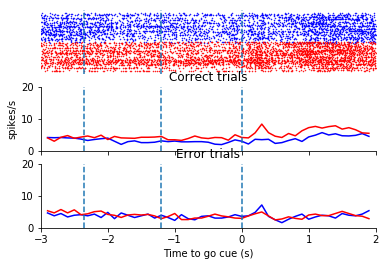

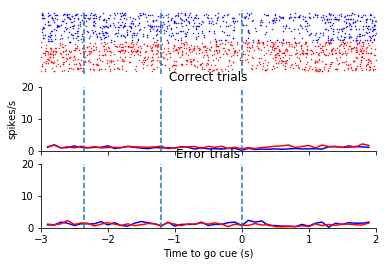

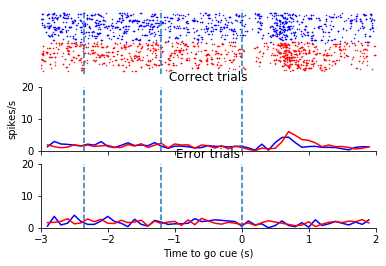

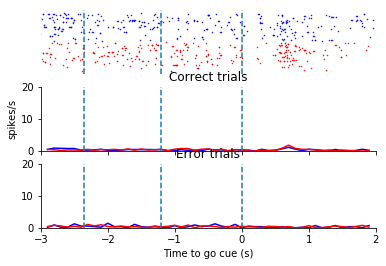

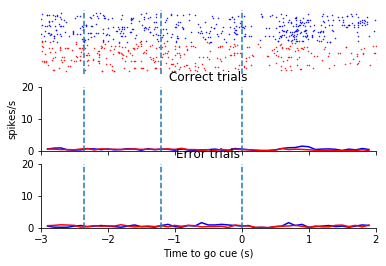

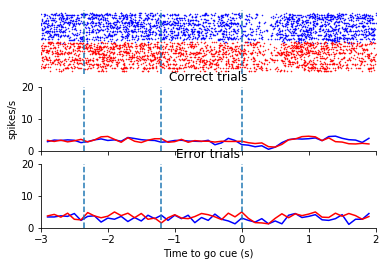

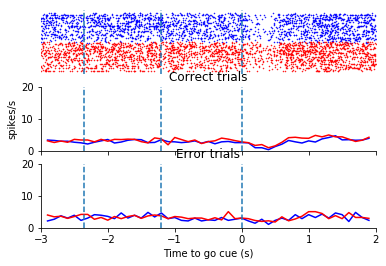

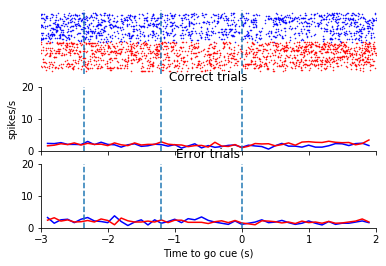

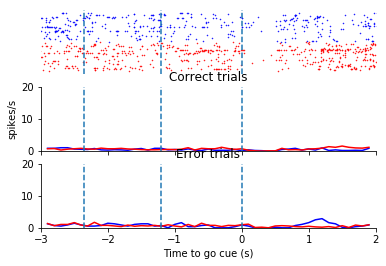

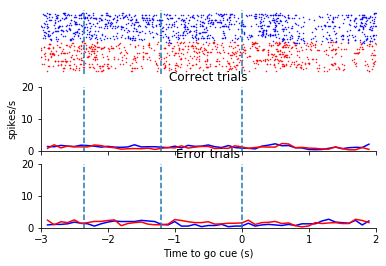

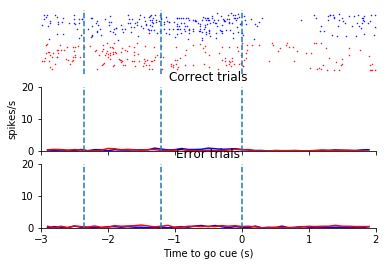

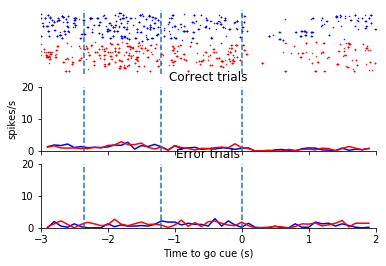

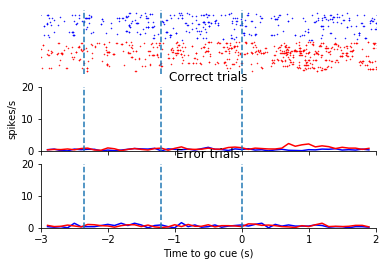

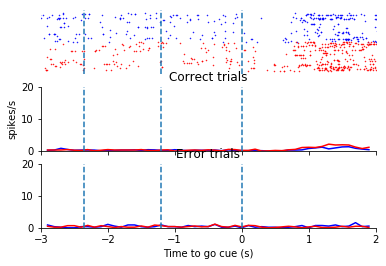

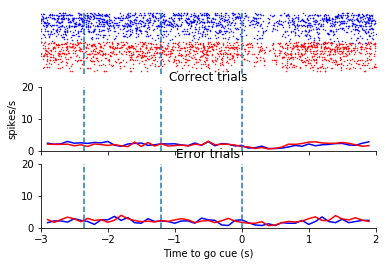

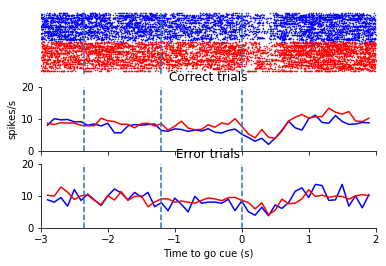

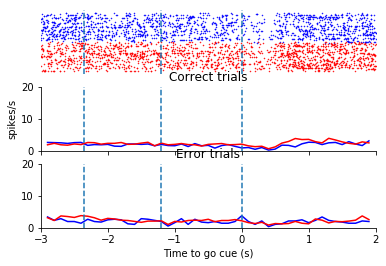

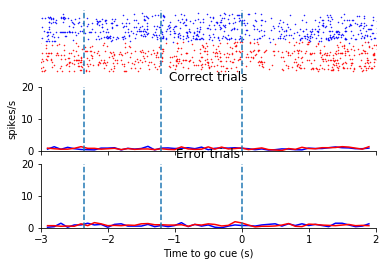

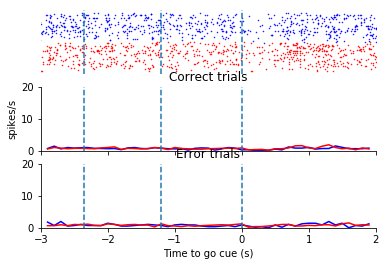

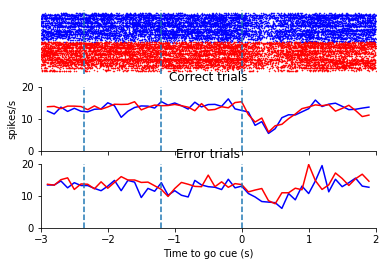

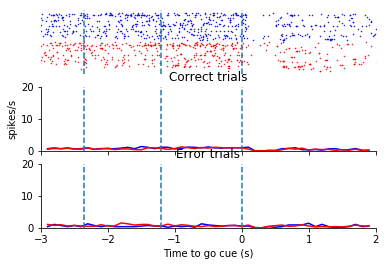

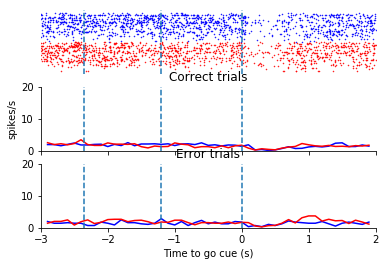

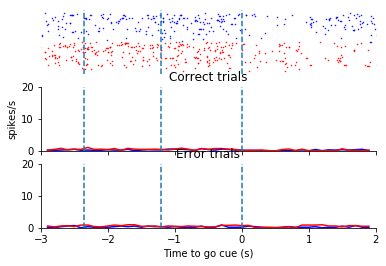

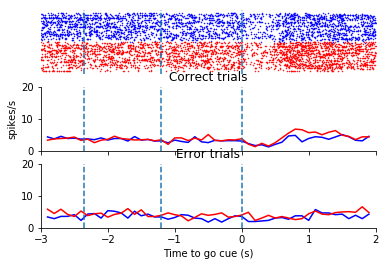

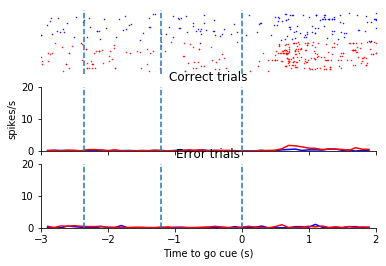

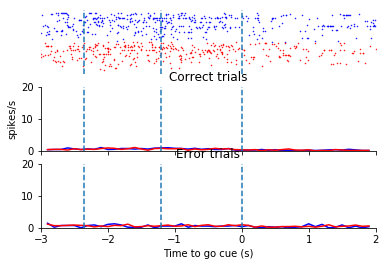

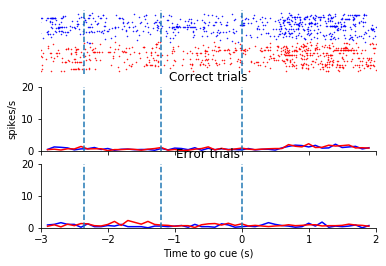

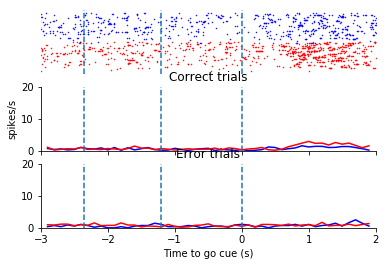

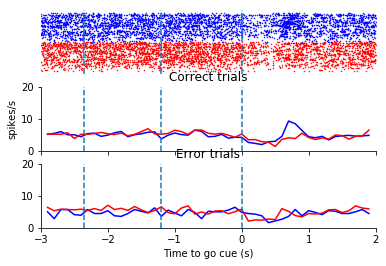

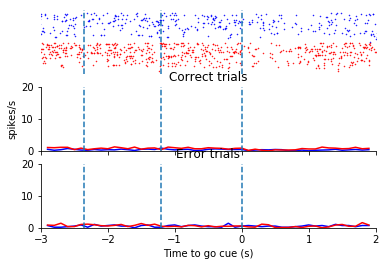

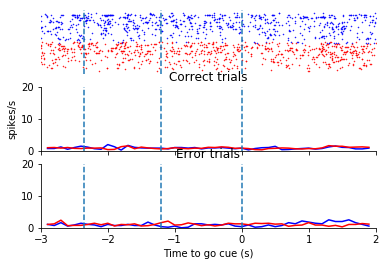

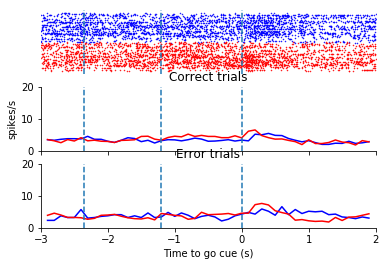

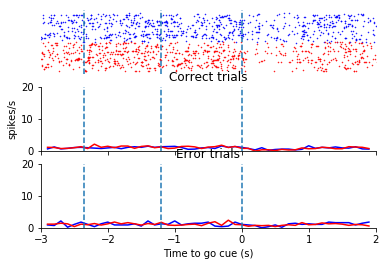

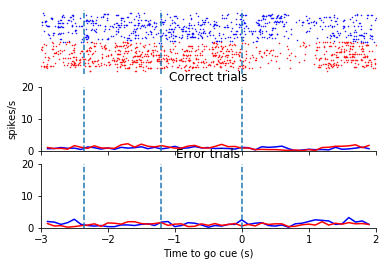

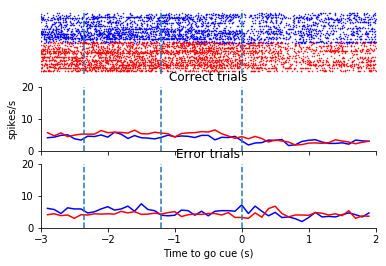

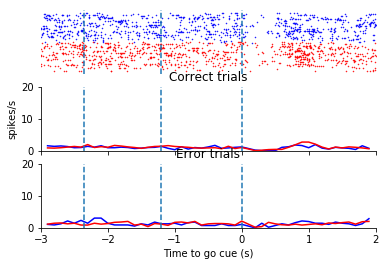

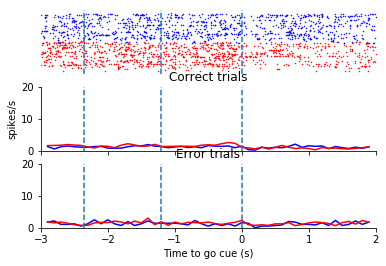

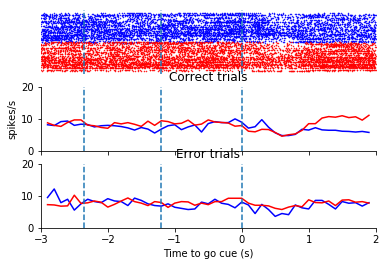

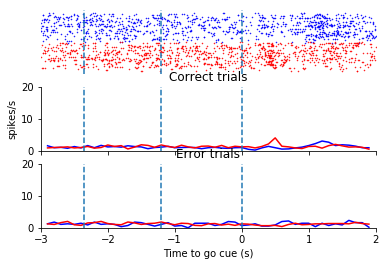

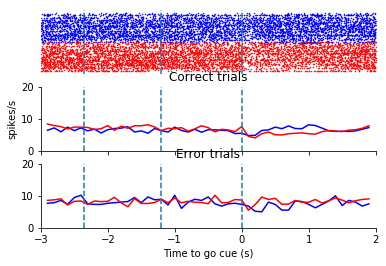

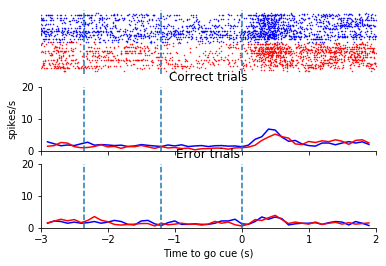

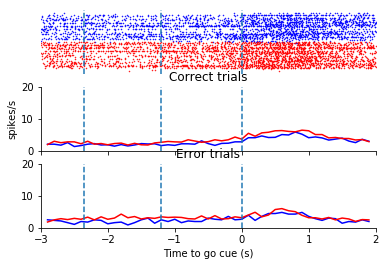

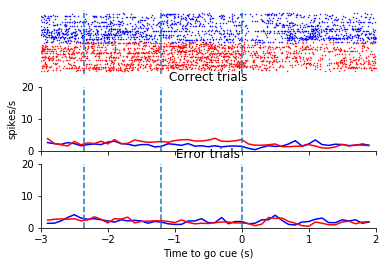

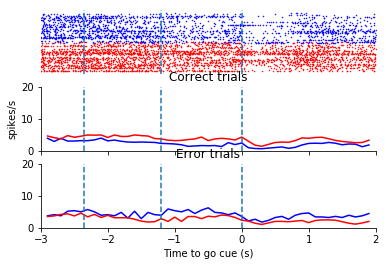

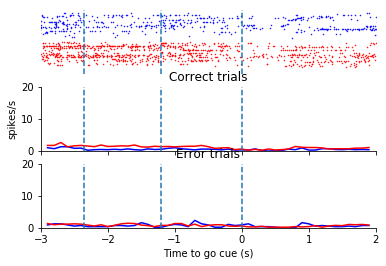

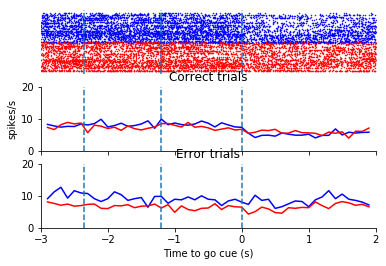

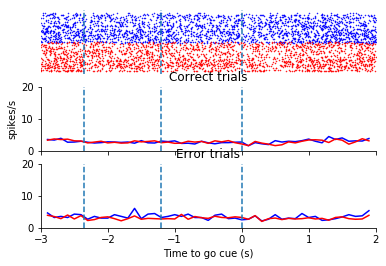

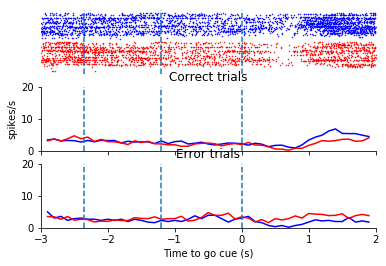

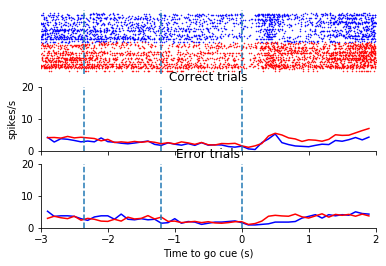

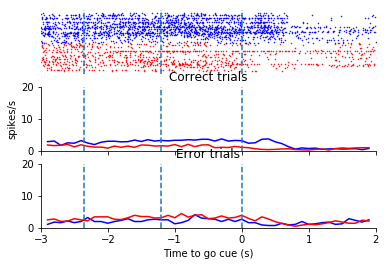

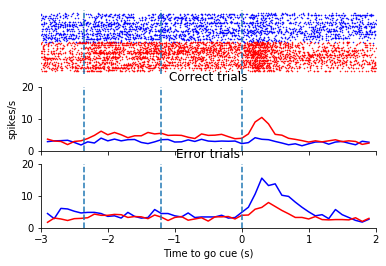

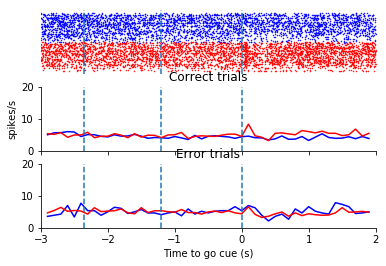

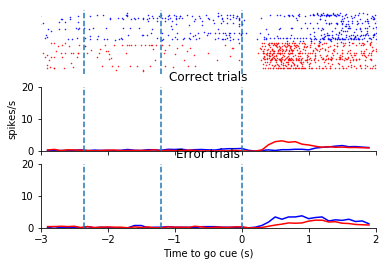

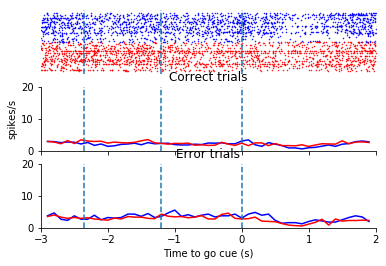

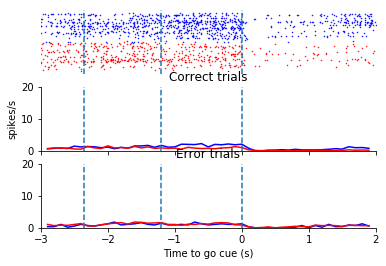

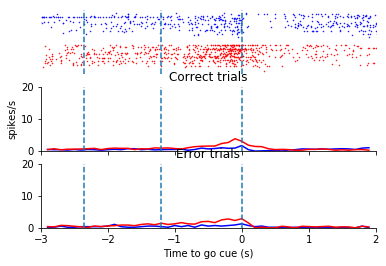

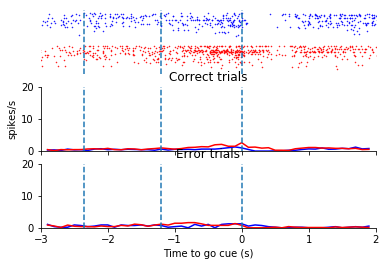

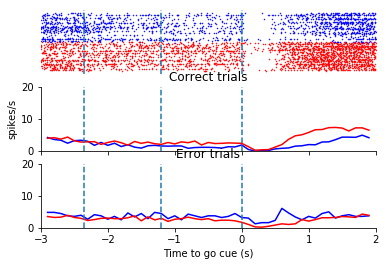

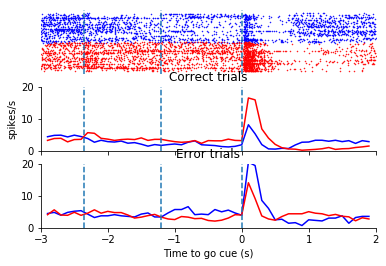

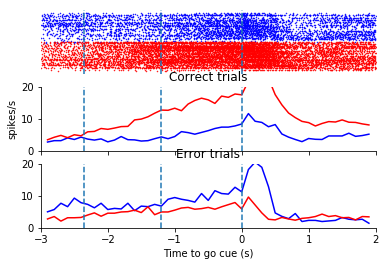

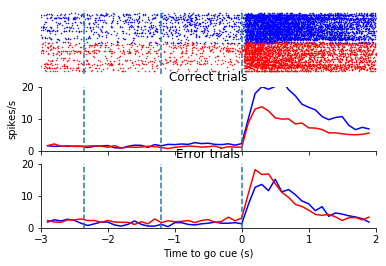

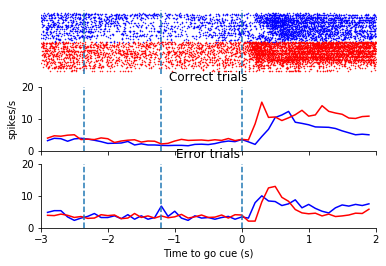

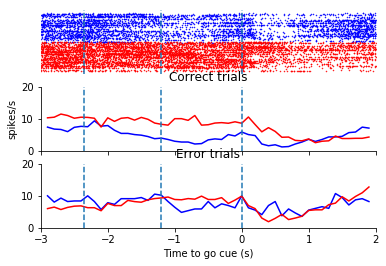

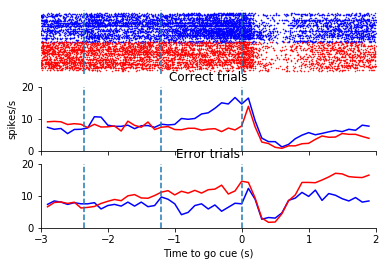

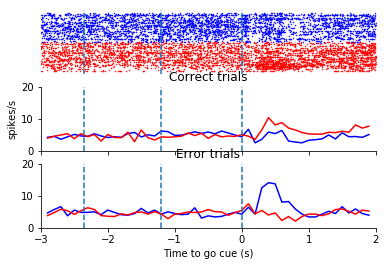

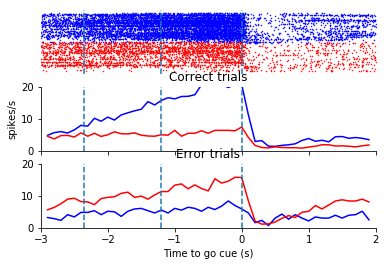

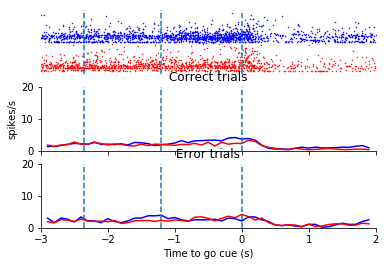

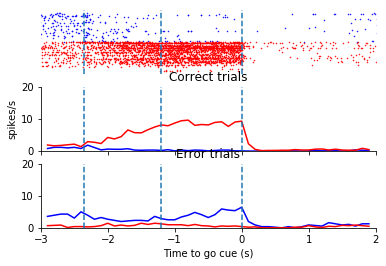

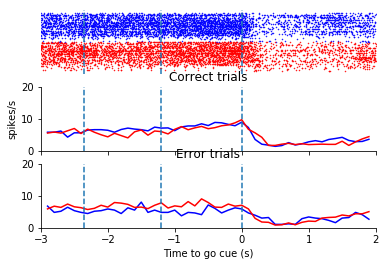

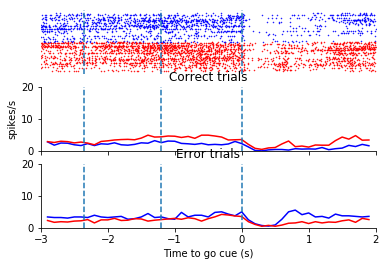

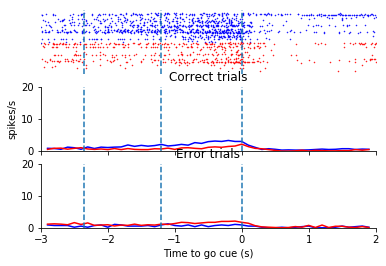

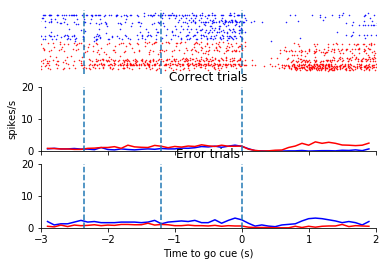

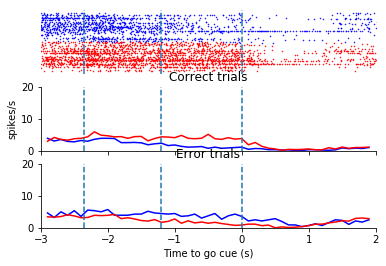

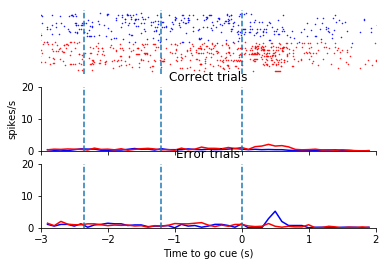

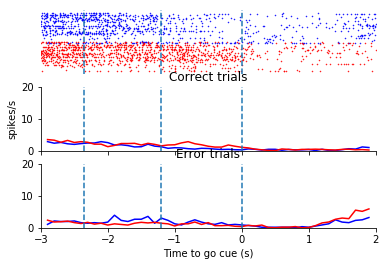

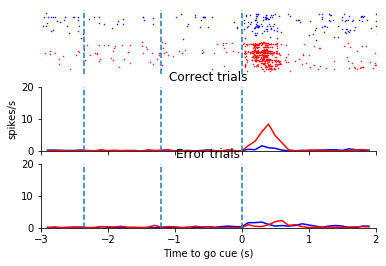

In [17]:
for x in goodUnits:
    unit1=(spike & {'unit': x} & {'subject_id': animal} & {'session': sessionN}).fetch('spike_time','trial')
    binSize=0.1;
    plt.figure()
    ax=plt.subplot(311)
    plt.plot(np.asarray(unit1[0][np.in1d(unit1[1],contraH)], dtype='float')-offset,unit1[1][np.in1d(unit1[1],contraH)]+500,'b.',markersize=1)
    plt.plot(np.asarray(unit1[0][np.in1d(unit1[1],ipsiH)], dtype='float')-offset,unit1[1][np.in1d(unit1[1],ipsiH)],'r.',markersize=1)
    ax.set_axis_off()
    ax.set_xlim([-3, 2])
    ax.axvline(0,0,1, ls='--')
    ax.axvline(-1.2,0,1, ls='--')
    ax.axvline(-2.35,0,1, ls='--')
    ax = plt.subplot(312)
    psth=np.histogram(np.asarray(unit1[0][np.in1d(unit1[1],contraH)], dtype='float')-offset,bins=np.arange(-3,2,binSize))
    plt.plot(psth[1][1:],psth[0]/len(contraH)/binSize, 'b')
    psth=np.histogram(np.asarray(unit1[0][np.in1d(unit1[1],ipsiH)], dtype='float')-offset,bins=np.arange(-3,2,binSize))
    plt.plot(psth[1][1:],psth[0]/len(ipsiH)/binSize, 'r')
    plt.ylabel('spikes/s')
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.set_xlim([-3, 2])
    ax.set_ylim([0, 20])
    ax.set_xticklabels([])
    ax.axvline(0,0,1, ls='--')
    ax.axvline(-1.2,0,1, ls='--')
    ax.axvline(-2.35,0,1, ls='--')
    plt.title('Correct trials')
    ax = plt.subplot(313)
    psth=np.histogram(np.asarray(unit1[0][np.in1d(unit1[1],contraE)], dtype='float')-offset,bins=np.arange(-3,2,0.1))
    plt.plot(psth[1][1:],psth[0]/len(contraE)/binSize, 'b')
    psth=np.histogram(np.asarray(unit1[0][np.in1d(unit1[1],ipsiE)], dtype='float')-offset,bins=np.arange(-3,2,0.1))
    plt.plot(psth[1][1:],psth[0]/len(ipsiE)/binSize, 'r')
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.set_xlim([-3, 2])
    ax.set_ylim([0, 20])
    ax.axvline(0,0,1, ls='--')
    ax.axvline(-1.2,0,1, ls='--')
    ax.axvline(-2.35,0,1, ls='--')
    plt.title('Error trials')
    plt.xlabel('Time to go cue (s)')

In [16]:
hfNeurons=[]
selectC=[]
selectI=[]
binSize=0.1
for x in range(0,400):
    unit1=(spike & {'unit': x} & {'animal': 399752} & 'session = 22').fetch('spike_time','trial') # find high firing neurons
    if len(unit1[0])/5/500>5:
        hfNeurons=np.append(hfNeurons, x)
        psthC=np.histogram(np.asarray(unit1[0][np.in1d(unit1[1],contraH)], dtype='float')-2.95,bins=np.arange(-3,2,binSize))
        psthI=np.histogram(np.asarray(unit1[0][np.in1d(unit1[1],ipsiH)], dtype='float')-2.95,bins=np.arange(-3,2,binSize)) 
        if len(unit1[0][np.in1d(unit1[1],contraH[0:400])]) > len(unit1[0][np.in1d(unit1[1],ipsiH[0:400])]):
            if len(selectC) == 0:
                selectC=(psthC[0]/len(contraH)-psthI[0]/len(ipsiH))/max(psthC[0]/len(contraH)-psthI[0]/len(ipsiH))
            elif len(selectC) != 0:
                selectC=np.vstack((selectC, (psthC[0]/len(contraH)-psthI[0]/len(ipsiH))/max(psthC[0]/len(contraH)-psthI[0]/len(ipsiH))))
        elif len(unit1[0][np.in1d(unit1[1],contraH[0:400])]) < len(unit1[0][np.in1d(unit1[1],ipsiH[0:400])]):
            if len(selectI) == 0:
                selectI=(psthI[0]/len(ipsiH)-psthC[0]/len(contraH))/min(psthC[0]/len(contraH)-psthI[0]/len(ipsiH))
            elif len(selectI) != 0:
                selectI=np.vstack((selectI, (psthI[0]/len(ipsiH)-psthC[0]/len(contraH))/min(psthC[0]/len(contraH)-psthI[0]/len(ipsiH))))

In [18]:
selectC=[]
selectI=[]
binSize=0.1
for x in goodUnits:
    unit1=(spike & {'unit': x} & {'subject_id': animal} & {'session': sessionN}).fetch('spike_time','trial') # find good neurons
    psthC=np.histogram(np.asarray(unit1[0][np.in1d(unit1[1],contraH)], dtype='float')-offset,bins=np.arange(-3,2,binSize))
    psthI=np.histogram(np.asarray(unit1[0][np.in1d(unit1[1],ipsiH)], dtype='float')-offset,bins=np.arange(-3,2,binSize)) 
    if len(unit1[0][np.in1d(unit1[1],contraH)])/len(contraH) > len(unit1[0][np.in1d(unit1[1],ipsiH)])/len(ipsiH):
        if len(selectC) == 0:
            selectC=(psthC[0]/len(contraH)-psthI[0]/len(ipsiH))/max(psthC[0]/len(contraH)-psthI[0]/len(ipsiH))
        elif len(selectC) != 0:
            selectC=np.vstack((selectC, (psthC[0]/len(contraH)-psthI[0]/len(ipsiH))/max(psthC[0]/len(contraH)-psthI[0]/len(ipsiH))))
    elif len(unit1[0][np.in1d(unit1[1],contraH)])/len(contraH) < len(unit1[0][np.in1d(unit1[1],ipsiH)])/len(ipsiH):
        if len(selectI) == 0:
            selectI=(psthI[0]/len(ipsiH)-psthC[0]/len(contraH))/min(psthC[0]/len(contraH)-psthI[0]/len(ipsiH))
        elif len(selectI) != 0:
            selectI=np.vstack((selectI, (psthI[0]/len(ipsiH)-psthC[0]/len(contraH))/min(psthC[0]/len(contraH)-psthI[0]/len(ipsiH))))

In [61]:
selectC[2]

array([ 0.2295082 ,  0.55737705,  0.47540984,  0.58469945,  1.        ,
        0.56830601,  0.15846995,  0.2568306 ,  0.60655738, -0.03278689,
        0.15846995,  0.46448087,  0.1147541 ,  0.40983607,  0.61202186,
       -0.42076503,  0.        , -0.60655738,  0.55191257,  0.13661202,
       -0.22404372, -0.09289617,  0.14754098,  0.26229508, -0.18579235,
       -0.46994536,  0.46448087, -0.40437158,  0.8852459 ,  0.44262295,
       -0.04371585,  0.2295082 , -0.04371585,  0.21857923,  0.38797814,
       -0.06557377,  0.26229508,  0.17486339,  0.20218579,  0.18579235,
        0.15846995,  0.3442623 ,  0.17486339,  0.21311475,  0.51912568,
        0.24043716, -0.04918033,  0.12021858,  0.30601093])

In [19]:
len(selectC)

16

In [20]:
len(selectI)

60

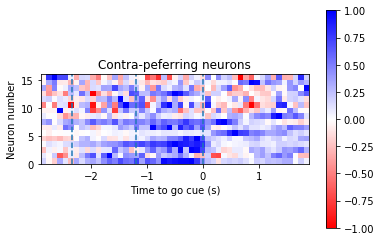

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.imshow(selectC[:][:],vmin=-1, vmax=1, extent=[psthC[1][1], psthC[1][-1], 0, len(selectC)])
plt.colorbar()
plt.set_cmap('bwr_r')
ax.set_aspect(0.1)
plt.title('Contra-peferring neurons')
plt.ylabel('Neuron number')
plt.xlabel('Time to go cue (s)')
ax.axvline(0,0,1, ls='--')
ax.axvline(-1.2,0,1, ls='--')
ax.axvline(-2.35,0,1, ls='--')

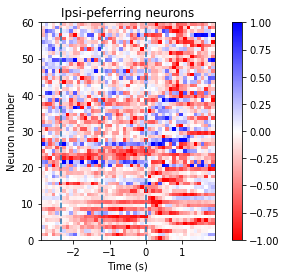

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.imshow(selectI[:][:],vmin=-1, vmax=1, extent=[psthI[1][1],psthI[1][-1],0, len(selectI)])
plt.colorbar()
plt.set_cmap('bwr_r')
ax.set_aspect(0.1)
plt.title('Ipsi-peferring neurons')
plt.ylabel('Neuron number')
plt.xlabel('Time (s)')
ax.axvline(0,0,1, ls='--')
ax.axvline(-1.2,0,1, ls='--')
ax.axvline(-2.35,0,1, ls='--')

In [23]:
sC=np.empty(len(hfNeurons))
sE=np.empty(len(hfNeurons))
for x in range(0,len(hfNeurons)): # choice related activity
    unit1=(spike & {'unit': hfNeurons[x]} & {'animal': 399752} & 'session = 22').fetch('spike_time','trial') # find high firing neurons
    spkC=np.asarray(unit1[0][np.in1d(unit1[1],contraH)], dtype='float')-2.95
    spkI=np.asarray(unit1[0][np.in1d(unit1[1],ipsiH)], dtype='float')-2.95
    spkCE=np.asarray(unit1[0][np.in1d(unit1[1],contraE)], dtype='float')-2.95
    spkIE=np.asarray(unit1[0][np.in1d(unit1[1],ipsiE)], dtype='float')-2.95
    sC[x]=(len(spkC[(spkC<2) & (spkC>0)])/len(contraH)-len(spkI[(spkI<2) & (spkI>0)])/len(ipsiH))/2
    sE[x]=(len(spkCE[(spkCE<2) & (spkCE>0)])/len(contraE)-len(spkIE[(spkIE<2) & (spkIE>0)])/len(ipsiE))/2

In [27]:
sC=np.empty(len(goodUnits))
sE=np.empty(len(goodUnits))
count=0
for x in goodUnits: # choice related activity
    unit1=(spike & {'unit': x} & {'subject_id': animal} & {'session': sessionN}).fetch('spike_time','trial') # find high firing neurons
    spkC=np.asarray(unit1[0][np.in1d(unit1[1],contraH)], dtype='float')-offset
    spkI=np.asarray(unit1[0][np.in1d(unit1[1],ipsiH)], dtype='float')-offset
    spkCE=np.asarray(unit1[0][np.in1d(unit1[1],contraE)], dtype='float')-offset
    spkIE=np.asarray(unit1[0][np.in1d(unit1[1],ipsiE)], dtype='float')-offset
#    sC[count]=(len(spkC[(spkC<2) & (spkC>0)])/len(contraH)-len(spkI[(spkI<2) & (spkI>0)])/len(ipsiH))/2
#    sE[count]=(len(spkCE[(spkCE<2) & (spkCE>0)])/len(contraE)-len(spkIE[(spkIE<2) & (spkIE>0)])/len(ipsiE))/2
    sC[count]=(len(spkC[(spkC<0) & (spkC>-1.2)])/len(contraH)-len(spkI[(spkI<0) & (spkI>-1.2)])/len(ipsiH))/2
    sE[count]=(len(spkCE[(spkCE<0) & (spkCE>-1.2)])/len(contraE)-len(spkIE[(spkIE<0) & (spkIE>-1.2)])/len(ipsiE))/2
    count=count+1

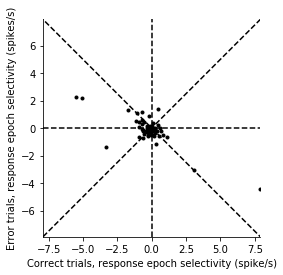

In [28]:
ax=plt.subplot(111)
plt.plot(sC,sE,'k.',[-15, 15], [-15, 15],'k--',[-15, 15], [15, -15],'k--')
plt.xlabel('Correct trials, response epoch selectivity (spike/s)')
plt.ylabel('Error trials, response epoch selectivity (spikes/s)')
plt.xlim(-max(sC), max(sC))
plt.ylim(-max(sC), max(sC))
plt.gca().set_aspect('equal', adjustable='box')
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)
ax.axvline(0,0,1, ls='--', color='k')
ax.axhline(0,0,1, ls='--', color='k')

In [29]:
np.corrcoef(sC, sE)

array([[ 1.        , -0.77103657],
       [-0.77103657,  1.        ]])

In [30]:
from scipy.stats import linregress
linregress(sC, sE)

LinregressResult(slope=-0.45910471340085907, intercept=-0.1700916636364832, rvalue=-0.7710365745446665, pvalue=3.721607265048209e-16, stderr=0.044077579156949515)

In [ ]:
hfNeurons=[]
selectC=[]
selectI=[]
binSize=0.1
for x in range(1,512):
    unit1=(spike & {'unit': x} & {'animal': 399752} & 'session = 22').fetch('spike_time','trial') # find high firing neurons
    if len(unit1[0])/5/500>4:
        hfNeurons=np.append(hfNeurons, x)
        psthC=np.histogram(np.asarray(unit1[0][np.in1d(unit1[1],contraH)], dtype='float')-2.95,bins=np.arange(-3,2,binSize))
        psthI=np.histogram(np.asarray(unit1[0][np.in1d(unit1[1],ipsiH)], dtype='float')-2.95,bins=np.arange(-3,2,binSize)) 
        if len(unit1[0][np.in1d(unit1[1],contraH[0:100])]) > len(unit1[0][np.in1d(unit1[1],ipsiH[0:100])]):
            if len(selectC) == 0:
                selectC=(psthC[0]/len(contraH)-psthI[0]/len(ipsiH))/max(psthC[0]/len(contraH)-psthI[0]/len(ipsiH))
            elif len(selectC) != 0:
                selectC=np.vstack((selectC, (psthC[0]/len(contraH)-psthI[0]/len(ipsiH))/max(psthC[0]/len(contraH)-psthI[0]/len(ipsiH))))
        elif len(unit1[0][np.in1d(unit1[1],contraH[0:100])]) < len(unit1[0][np.in1d(unit1[1],ipsiH[0:100])]):
            if len(selectI) == 0:
                selectI=(psthI[0]/len(ipsiH)-psthC[0]/len(contraH))/min(psthC[0]/len(contraH)-psthI[0]/len(ipsiH))
            elif len(selectI) != 0:
                selectI=np.vstack((selectI, (psthI[0]/len(ipsiH)-psthC[0]/len(contraH))/min(psthC[0]/len(contraH)-psthI[0]/len(ipsiH))))# coding direction

In [ ]:
selectC

In [ ]:
# noise correlation

In [1]:
import h5py
import numpy as np


c:\users\liul.hhmi\appdata\local\programs\python\python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [12]:
#file="C:\\Users\liul.HHMI\Desktop\\tw5ap_imec3_opt3_jrc.mat"
file="C:\\Users\liul.HHMI\Desktop\\dl25_bitcode.mat"
f = spio.File(file,'r')

In [13]:
trWav_raw_clu = f['S_clu']['trWav_raw_clu']

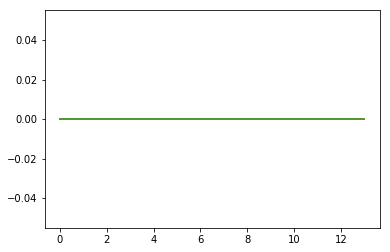

In [14]:
plt.plot(trWav_raw_clu[1][:])

In [ ]:
trWav_raw_clu[0]

In [ ]:
a= np.concatenate((trWav_raw_clu[0:1][:][:],trWav_raw_clu), axis=0)

In [ ]:
a[2][0]

In [ ]:
np.(1,4)

In [48]:
csNote_clu=f['S_clu']['csNote_clu'][0]

In [62]:
strs = ["multi" for x in range(len(csNote_clu))]
for iU in range(0, len(csNote_clu)):
    unitQ = f[csNote_clu[iU]]
    str1 = ''.join(chr(i) for i in unitQ[:])
    if str1 == 'single':
        strs[iU] = 'good'
    elif str1 =='multi':
        strs[iU] = 'ok'

In [63]:
strs

['good',
 'good',
 'good',
 'multi',
 'multi',
 'multi',
 'multi',
 'multi',
 'multi',
 'multi',
 'multi',
 'multi',
 'multi',
 'multi',
 'multi',
 'multi',
 'multi',
 'good',
 'good',
 'multi',
 'multi',
 'multi',
 'multi',
 'multi',
 'multi',
 'good',
 'good',
 'multi',
 'good',
 'multi',
 'multi',
 'good',
 'good',
 'good',
 'multi',
 'multi',
 'good',
 'multi',
 'good',
 'multi',
 'multi',
 'multi',
 'good',
 'multi',
 'good',
 'good',
 'good',
 'good',
 'good',
 'multi',
 'good',
 'multi',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'multi',
 'multi',
 'multi',
 'good',
 'multi',
 'good',
 'good',
 'good',
 'multi',
 'multi',
 'multi',
 'multi',
 'good',
 'multi',
 'good',
 'good',
 'multi',
 'multi',
 'multi',
 'multi',
 'good',
 'multi',
 'multi',
 'multi',
 'multi',
 'good',
 'good',
 'multi',
 'good',
 'multi',
 'multi',
 'multi',
 'multi',
 'multi',
 'multi',
 'multi',
 'multi',
 'multi',
 'multi',
 'multi',
 'multi',
 '

884